<a href="https://colab.research.google.com/github/PabloGuev17/DatosGeoEspaciales/blob/main/MCD_CDGE_tutorial1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <img style="float: left; padding: 0px 10px 0px 0px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg/1920px-Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg.png"  width="80" /> MCD3100 - Ciencia de Datos Geoespaciales
**Pontificia Universidad Católica de Chile**<br>
**Magister en Ciencia de Datos**<br>

# Tutorial 1: Herramientas computacionales para el manejo de datos vectoriales.

Este tutorial tiene como objetivos:
- Introducir las librerías clave de Python para el trabajo con datos vectoriales.
- Identificar los sistemas de referencia de coordenadas (SRC) en los cuales se presenta un dataset vectorial.
- Realizar transformaciones entre distintos SRCs.
- Crear geometrías y geodataframes.
- Superponer en un mismo gráfico distintas capas vectoriales.

## 1. Librerías de Python para operación y análisis de datos vectoriales.

En este primer tutorial comenzaremos a familiarizarnos con un conjunto de librerías fundamentales para trabajar con datos vectoriales en ciencia de datos geoespacial. Estas herramientas nos permitirán cargar, explorar, manipular y visualizar capas en formatos como Shapefile, GeoJSON o GeoPackage, estableciendo las bases para análisis más avanzados en los siguientes módulos.

- **Geopandas**: Extiende las capacidades de `pandas` para manejar datos espaciales, permitiendo cargar, manipular y analizar geometrías (puntos, líneas y polígonos) de forma intuitiva. Revisa acá la [documentación](https://geopandas.org/)

- **Shapely**: Librería para crear y operar con geometrías de manera eficiente. Permite realizar operaciones como intersecciones, uniones, buffers y mediciones espaciales. Revisa acá la [documentación](https://shapely.readthedocs.io/)

- **Contextily**: Facilita la incorporación de mapas base (basemaps) desde proveedores como OpenStreetMap, añadiendo contexto visual a los datos espaciales. Trabaja principalmente en proyección Web Mercator. Revisa acá la [documentación](https://contextily.readthedocs.io/ )

Pra todo el desarrollo del curso, es fundamental que te familiarizes con la documentación de cada librería, de maneras que puedas consultarla y encontrar rápidamente información y ejemplos útiles cada vez que necesites recordar el detalle de alguna función.

A continuación, importaremos estas librerías:

In [14]:
!pip install contextily


In [15]:
!pip install geopandas contextily shapely pyproj fiona


In [16]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import shapely
import contextily as ctx


## 2. Datos: Cartografía pre-censal para la comuna de Viña del Mar, Chile.

Para este  primer ejercicio de análisis de datos vectoriales, trabajaremos un con tipo de datos esenciales para muchos problemas de ciencia de datos geoespacial: los datos censales.

Los datos y la cartografía censal son un pilar fundamental en la ciencia de datos geoespacial, ya que proporcionan información estandarizada, exhaustiva y territorialmente detallada sobre la población, las viviendas y las características socioeconómicas de un país. Estas capas permiten analizar patrones espaciales, identificar desigualdades territoriales, construir indicadores a distintas escalas (manzana, zona, comuna) y vincular variables demográficas con datos ambientales, de infraestructura o movilidad. En síntesis, la cartografía censal ofrece el marco espacial imprescindible para contextualizar y enriquecer cualquier análisis geoespacial orientado a la toma de decisiones informadas.

En cada país, existen instituciones encargadas de planificar, aplicar, analizar y publicar los datos derivados de los Censos de Población. En Chile, esta labor corresponde al Instituto Nacional de Estadísticas [(INE)](www.ine.cl), que recientemente publicó los datos del [Censo 2024](https://censo2024.ine.gob.cl/resultados/).

### 2.1 Cartografía Pre-censal.

En este primer tutorial, nos enfocaremos en la **cartografía precensal**: el conjunto de mapas, archivos espaciales y bases de datos que se elaboran antes de un censo con el fin de planificar y organizar el trabajo de levantamiento en terreno. Incluye la delimitación y actualización de unidades geográficas como manzanas, sectores censales, zonas y áreas operativas, además de la identificación de viviendas, edificaciones y límites administrativos.

Su objetivo es garantizar que el censo pueda realizarse de manera ordenada, completa y sin omisiones, proporcionando una base espacial precisa que permita asignar cargas de trabajo a los censistas, optimizar rutas y asegurar la cobertura total del territorio. Es, en esencia, la infraestructura geográfica que hace posible un conteo censal eficiente y de alta calidad.

La cartografía final del Censo 2024, estará disponible desde diciembre 2024 en la página web. Por ahora, utilizaremos una versión previamente descargada de la cartografía precensal, para la región de Valparaíso, Chile. En la carpeta [APC_2023_R5] encontrarás varias capas vectoriales correspondientes a:
- Límites comunales: `Comunal.shp`
- Ejes viales: `Eje_Vial.shp`
- Manzanas censales: `Manzana_Urbana.shp`

### 2.2 Datos de Establecimientos de Salud.

A la cartografía censal, agregaremos también la información de los centros de atención de salud, que es reportada semestralmente por el Departamento de Estadísticas e Información de Salud ([DEIS](https://deis.minsal.cl/)) del Ministerio de Salud de Chile.  En particular, usaremos el [Listado de Establecimientos 2025](https://repositoriodeis.minsal.cl/DatosAbiertos/Establecimientos%20DEIS%20MINSAL%2025-11-2025.xlsx).

**Todos los datos utilizados en este ejercicio están contenidos en la carpeta `data_T1`entregada junto a este Notebook.**


## 3. Ejercicios: Conociendo los datos censales.

### 3.1 Lectura e inspección de datos vectoriales.

In [7]:
path='data_T1' #modificar a su ruta local

In [18]:
comuna=gpd.read_file('/content/Comunal.shp')
vial=gpd.read_file('/content/Eje_Vial.shp')
manz=gpd.read_file('/content/Manzana_Urbana.shp')

In [20]:
comuna.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   CUT         38 non-null     int64   
 1   N_REGION    38 non-null     object  
 2   N_PROVINCI  38 non-null     object  
 3   N_COMUNA    38 non-null     object  
 4   SHAPE_Leng  38 non-null     float64 
 5   SHAPE_Area  38 non-null     float64 
 6   geometry    38 non-null     geometry
dtypes: float64(2), geometry(1), int64(1), object(3)
memory usage: 2.2+ KB


In [21]:
comuna.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - Central America and South America - onshore and offshore. Brazil - onshore and offshore.
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [22]:
vial.head()


,CUT,N_REGION,N_PROVINCI,N_COMUNA,CLASE_COMU,CLASE_URBA,NOMBRE,ALIAS,ROL,SHAPE_Leng,geometry
0,5109,VALPARAÍSO,VALPARAÍSO,VIÑA DEL MAR,N/A,CARRETERA,VARIANTE AGUA SANTA,None,60-CH,0.001226,"LINESTRING (-71.54532 -33.09605, -71.54637 -33..."
1,5109,VALPARAÍSO,VALPARAÍSO,VIÑA DEL MAR,N/A,CARRETERA,VARIANTE AGUA SANTA,None,60-CH,0.001214,"LINESTRING (-71.5463 -33.09677, -71.54566 -33...."
2,5109,VALPARAÍSO,VALPARAÍSO,VIÑA DEL MAR,N/A,CARRETERA,VARIANTE AGUA SANTA,None,60-CH,0.020541,"LINESTRING (-71.54704 -33.07869, -71.54701 -33..."
3,5109,VALPARAÍSO,VALPARAÍSO,VIÑA DEL MAR,N/A,CARRETERA,VARIANTE AGUA SANTA,None,60-CH,0.001376,"LINESTRING (-71.54759 -33.07744, -71.5475 -33...."
4,5109,VALPARAÍSO,VALPARAÍSO,VIÑA DEL MAR,N/A,CARRETERA,VÍA LAS PALMAS,None,60-CH,0.000040,"LINESTRING (-71.54765 -33.07743, -71.54763 -33..."


Para identificar el SRC de un dataset cualquiera, inspeccionamos el atributo `.crs`

In [23]:
manz.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - Central America and South America - onshore and offshore. Brazil - onshore and offshore.
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

El método `.info()` permite identificar las propiedades generales del GeoDataFrame:

In [24]:
manz.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 27650 entries, 0 to 27649
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   CUT         27650 non-null  int64   
 1   N_REGION    27650 non-null  object  
 2   N_PROVINCI  27650 non-null  object  
 3   N_COMUNA    27650 non-null  object  
 4   N_URBANO    27650 non-null  object  
 5   MANZENT     27650 non-null  float64 
 6   COD_DISTRI  27650 non-null  int64   
 7   COD_ZONA    27650 non-null  int64   
 8   COD_MANZAN  27650 non-null  int64   
 9   VIV_COLECT  27650 non-null  int64   
 10  OTRO_USO    27650 non-null  int64   
 11  VIVIENDA    27650 non-null  int64   
 12  Mzent_TX    27650 non-null  object  
 13  SHAPE_Leng  27650 non-null  float64 
 14  SHAPE_Area  27650 non-null  float64 
 15  geometry    27650 non-null  geometry
dtypes: float64(3), geometry(1), int64(7), object(5)
memory usage: 3.4+ MB


Y para graficar el dataset, usamos el método `plot()`de geopandas:

<Axes: >

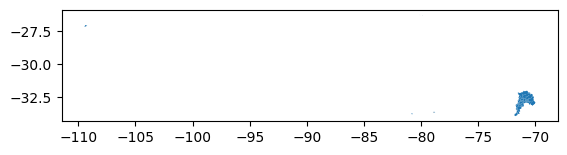

In [25]:
comuna.plot()

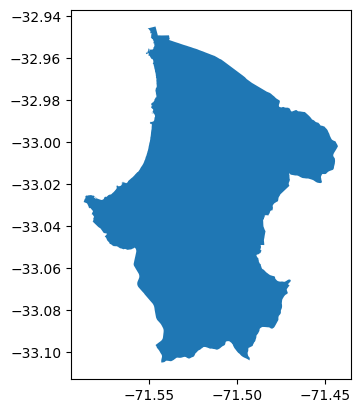

In [26]:
vina=comuna[comuna['N_COMUNA']=='VIÑA DEL MAR']
vina.plot();

In [27]:
vina=comuna[comuna['N_COMUNA']=='VIÑA DEL MAR']
vial=vial[vial['N_COMUNA']=='VIÑA DEL MAR']
manz_vina=manz[manz['N_COMUNA']=='VIÑA DEL MAR']

### 3.2 Creación de geometrías a partir de datos tabulares.

Los datos de Establecimientos de Salud están en formato Excel, y contienen columnas con las coordenadas geográficas, que están dadas en el SRC EPSG:4326.

In [29]:
salud=pd.read_excel('/content/EstablecimientosDEIS_MINSAL_22-10-2025.xlsx')
salud=salud[salud['Nombre Comuna']=='Viña del Mar']

In [30]:
salud.head()

,Código Antiguo,Código Vigente,Código Madre Antiguo,Código Madre Nuevo,Código Región,Nombre Región,Código Dependencia Jerárquica (SEREMI / Servicio de Salud),Nombre Dependencia Jerárquica (SEREMI / Servicio de Salud),Pertenencia al SNSS,Tipo Establecimiento (Unidad),...,Tiene Servicio de Urgencia,Tipo de Urgencia,Clasificación Tipo de SAPU,LATITUD [Grados decimales],LONGITUD [Grados decimales],Tipo de Prestador Sistema de Salud,Estado de Funcionamiento,Nivel de Complejidad,Tipo de Atención,Fecha de Incorporación a la base
545,07-350,107350,NaN,NaN,5,Región de Valparaíso,7,Servicio de Salud Viña del Mar Quillota,Perteneciente al Sistema Nacional de Servicios...,Clínica Dental,...,NO,No Aplica,No Aplica,-33.053069,-71.500539,Público,Vigente en operación habitual,No Aplica,Atención Abierta-Ambulatoria,NaN
3148,07-727,107727,07-327,107327,5,Región de Valparaíso,7,Servicio de Salud Viña del Mar Quillota,Perteneciente al Sistema Nacional de Servicios...,Centro Comunitario de Salud Familiar (CECOSF),...,NO,No Aplica,No Aplica,-33.05885,-71.53753,Público,Vigente en operación habitual,Baja Complejidad,Atención Abierta-Ambulatoria,NaN
3175,07-300,107300,NaN,NaN,5,Región de Valparaíso,7,Servicio de Salud Viña del Mar Quillota,Perteneciente al Sistema Nacional de Servicios...,Centro de Salud Familiar (CESFAM),...,NO,No Aplica,No Aplica,-33.0481,-71.56457,Público,Vigente en operación habitual,Baja Complejidad,Atención Abierta-Ambulatoria,NaN
3176,07-800,107800,07-300,107300,5,Región de Valparaíso,7,Servicio de Salud Viña del Mar Quillota,Perteneciente al Sistema Nacional de Servicios...,Servicio de Atención Primaria de Urgencia (SAPU),...,SI,Urgencia Ambulatoria (SAPU),Largo,-33.04773,-71.564586,Público,Vigente en operación habitual,Baja Complejidad,Atención Abierta-Ambulatoria,NaN
3181,07-901,200111,07-327,107327,5,Región de Valparaíso,7,Servicio de Salud Viña del Mar Quillota,Perteneciente al Sistema Nacional de Servicios...,Servicio de Atención Primaria de Urgencia (SAPU),...,SI,Urgencia Ambulatoria (SAPU),Corto,-33.046447,-71.539241,Público,Vigente en operación habitual,Baja Complejidad,Atención Abierta-Ambulatoria,NaN


In [31]:
salud['lat']=salud['LATITUD [Grados decimales]']
salud['lon']=salud['LONGITUD [Grados decimales]']

In [32]:
salud[['lon','lat']]

,lon,lat
545,-71.500539,-33.053069
3148,-71.53753,-33.05885
3175,-71.56457,-33.0481
3176,-71.564586,-33.04773
3181,-71.539241,-33.046447
...,...,...
4273,-71.546815,-33.013132
4332,-71.533587,-32.984713
4346,-71.559784,-33.022616
4397,-71.552159,-33.016841


In [33]:
salud_gdf=gpd.GeoDataFrame(salud,geometry=gpd.points_from_xy(salud['lon'],salud['lat'],crs=4326))

<Axes: >

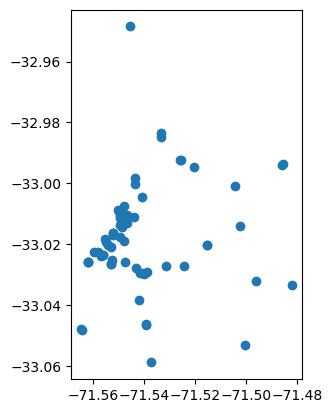

In [34]:
salud_gdf.plot()

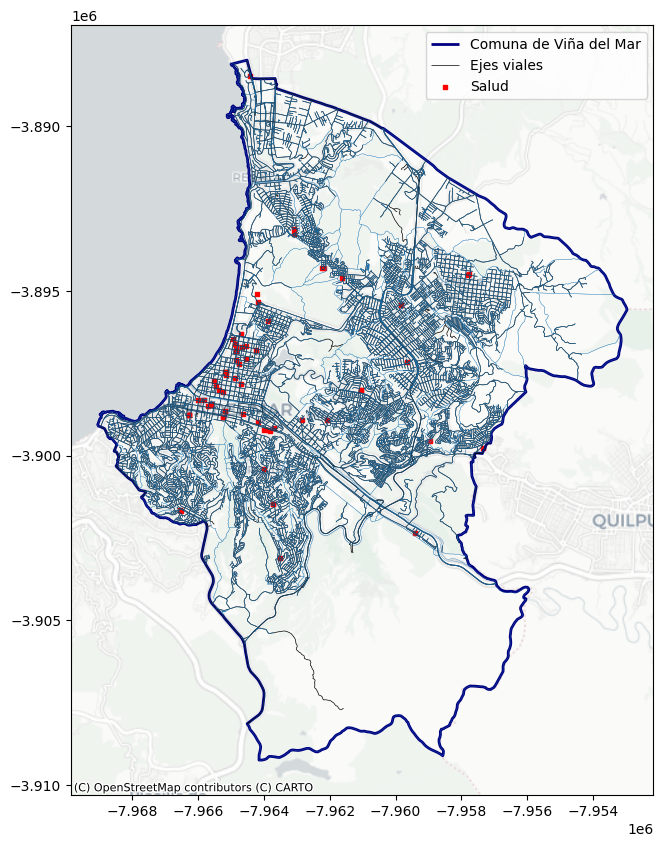

In [35]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

crs='3857'

vina.to_crs(crs).boundary.plot(ax=ax,color='navy',lw=2,label='Comuna de Viña del Mar')
vial.to_crs(crs).plot(ax=ax,color='k',lw=0.5,label='Ejes viales')

manz_vina.to_crs(crs).boundary.plot(ax=ax,lw=0.2)


salud_gdf.to_crs(crs).plot(ax=ax,color='r',markersize=12,marker='s',label='Salud')
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

ax.legend();
#fig.savefig('vinadelmar.jpg',dpi=300,bbox_inches='tight')

### 3.3 Creación de una geometría puntual.

In [36]:
from shapely import Point

lat=-33.02310120139368
lon=-71.56716829999999

point=Point(lon,lat)

reloj=gpd.GeoDataFrame(geometry=[Point(lon,lat)],crs=4326)

<Axes: >

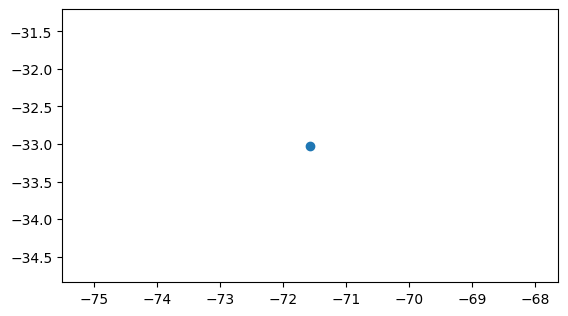

In [37]:
reloj.plot()

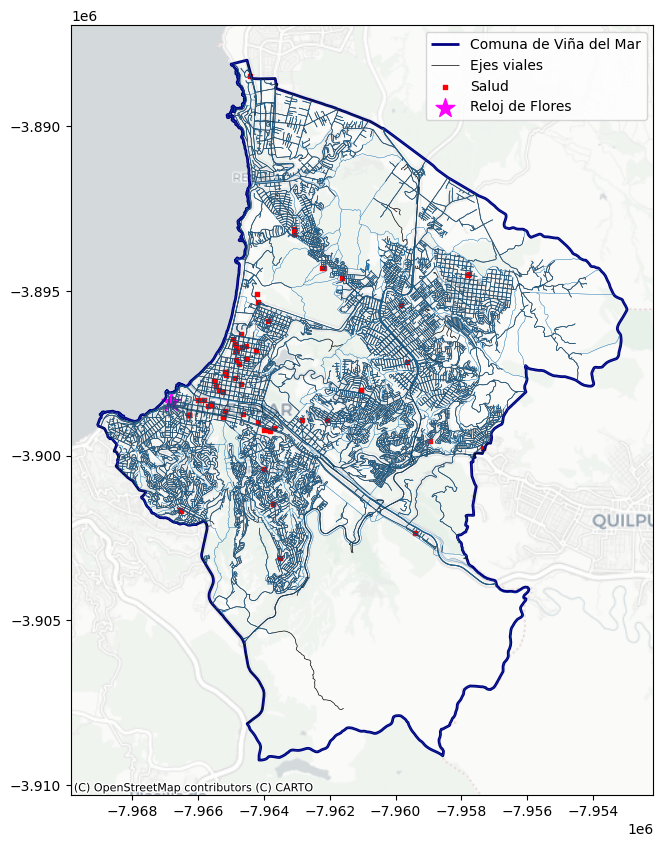

In [38]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

crs='3857'

vina.to_crs(crs).boundary.plot(ax=ax,color='navy',lw=2,label='Comuna de Viña del Mar')
vial.to_crs(crs).plot(ax=ax,color='k',lw=0.5,label='Ejes viales')

manz_vina.to_crs(crs).boundary.plot(ax=ax,lw=0.2)


salud_gdf.to_crs(crs).plot(ax=ax,color='r',markersize=12,marker='s',label='Salud')
reloj.to_crs(crs).plot(ax=ax,marker='*',markersize=200,color='magenta',label='Reloj de Flores')
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

ax.legend();

### 3.4 Exportar archivos.

El comando [`gpd.to_file()`](https://geopandas.org/en/latest/docs/reference/api/geopandas.GeoDataFrame.to_file.html) permite exportar GeoDataFrames en distintos formatos vectoriales, como por ejemplo `geopackage`:

In [40]:
vina.to_file('vm_comuna.gpkg',driver='GPKG')
manz_vina.to_file('vm_manz.gpkg',driver='GPKG')
salud_gdf.to_file('vm_salud.gpkg',driver='GPKG')
vial.to_file('vm_vial.gpkg',driver='GPKG')


TypeError: Invalid dtype object for __floordiv__